In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn import ensemble
import xgboost

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os 
print(os.listdir("../data")) # this will list files in input directory

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


# Load Data

In [11]:
raw_train=pd.read_csv('../data/train.csv')
raw_test=pd.read_csv('../data/test.csv')

In [12]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
raw_train.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
raw_test.tail(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


We are merging data together, so we can process data, after feature engineering we will split 

In [7]:
data=pd.concat([raw_train, raw_test], axis=0).reset_index(drop=True) # concatinating test and train removing index
data.head(2)
data.tail(2) # surviced will be NaN for test data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
data.isnull().sum()  # finding null per column

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# Visualization & Data Cleaning

### Cabin

In [10]:
data["Cabin"].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
F2                 4
C22 C26            4
F33                4
D                  4
F4                 4
C78                4
A34                3
E101               3
C101               3
B58 B60            3
B51 B53 B55        3
E34                3
C89                2
C83                2
E31                2
F G63              2
B28                2
B5                 2
E121               2
C68                2
D28                2
C55 C57            2
C52                2
C106               2
C86                2
D10 D12            2
                  ..
C99                1
B94                1
F E69              1
C148               1
E36                1
B102               1
C87                1
D49                1
B11                1
F E57              1
C132               1
B38                1
B101               1
E39 E41            1
E45                1
A29                1
C128         

In [11]:
data["Cabin"].isnull().sum()

1014

In [12]:
# Replace NA as X, kepp initial
data["Cabin"]=data['Cabin'].fillna('X')
data['Cabin']=data['Cabin'].str.get(0) # cabin number is like 'A01', 'B99' etc. so just keeping first letter to get category

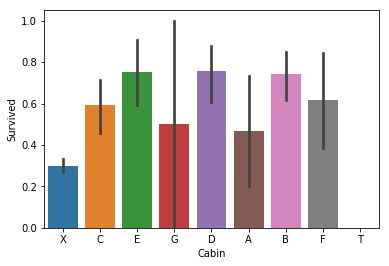

In [13]:
sns.barplot(x="Cabin", y="Survived", data=data) # relation between Cabin and survival

### Embarked

In [14]:
data['Embarked'].isnull().sum()

2

In [15]:
data['Embarked'].value_counts() # embarked - from where, C = Cherbourg, Q = Queenstown, S = Southampton

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
data[data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


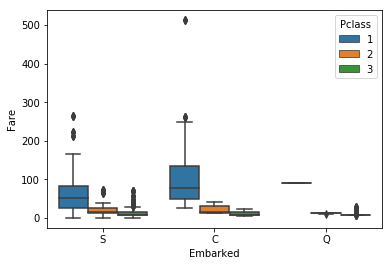

In [17]:
 sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=data) # relation between Embarked and Fare for each Class


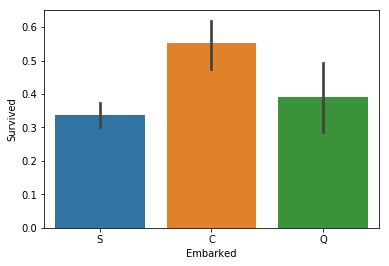

In [18]:
sns.barplot(x='Embarked',y="Survived",data=data)

In [19]:
data['Embarked']=data['Embarked'].fillna('C')

### Fare

In [20]:
data[data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,X,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [21]:
fare=data[(data['Age'] >60) & (data['Embarked'] == "S") & (data['Pclass'] == 3)].Fare # find all fares matching condition
data['Fare']=data['Fare'].fillna(fare.median()) # find media and assign

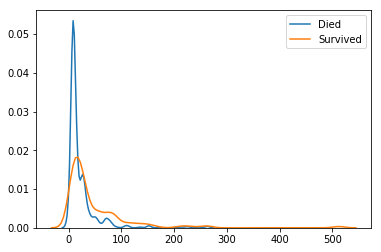

In [22]:
sns.kdeplot(data.loc[data['Survived'] == 0, 'Fare'], label='Died')
sns.kdeplot(data.loc[data['Survived'] == 1, 'Fare'], label='Survived')

### Name

In [23]:
data.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [24]:
# Get Title from Name
data["Title"] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
data["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Sir               1
Mme               1
Jonkheer          1
Dona              1
Don               1
Lady              1
the Countess      1
Capt              1
Name: Title, dtype: int64

In [25]:
data["Title"] = data["Title"].replace(['Mlle','Ms'], 'Miss')
data["Title"] = data["Title"].replace(['Mme'], 'Mrs')
data["Title"] = data["Title"].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt'], 'Officer')
data["Title"] = data["Title"].replace(['the Countess', 'Don', 'Lady', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
data["Title"].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

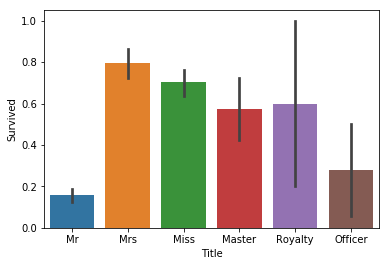

In [26]:
sns.barplot(x="Title", y="Survived", data=data)

### Parch & SibSp

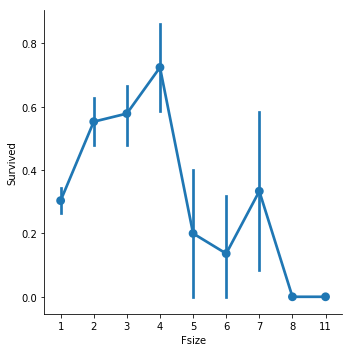

In [27]:
# Create a family size descriptor from SibSp and Parch
data["Fsize"] = data["SibSp"] + data["Parch"] + 1
sns.factorplot(x="Fsize",y="Survived",data = data)

In [28]:
# Create new feature of family size
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
data['FamilyLabel']=data['Fsize'].apply(Fam_label)

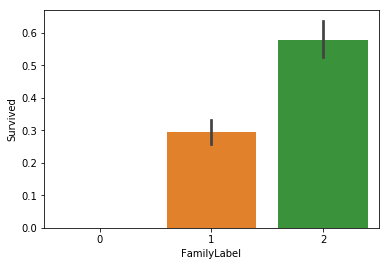

In [29]:
sns.barplot(x="FamilyLabel", y="Survived", data=data)

### Pclass

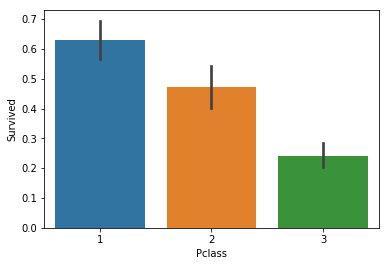

In [30]:
sns.barplot(x="Pclass", y="Survived", data=data)

### Sex

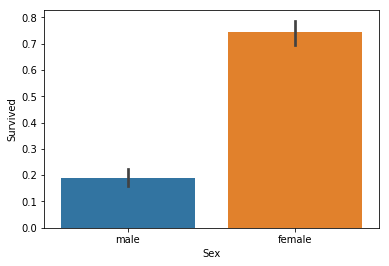

In [31]:
sns.barplot(x="Sex", y="Survived", data=data)

### Ticket

In [32]:
data['Ticket'].value_counts() # ticket sale per ticket type from 1 to 11

CA. 2343             11
1601                  8
CA 2144               8
S.O.C. 14879          7
PC 17608              7
3101295               7
347077                7
347082                7
113781                6
19950                 6
347088                6
382652                6
4133                  5
W./C. 6608            5
113503                5
349909                5
16966                 5
PC 17757              5
220845                5
C.A. 33112            4
PC 17483              4
W./C. 6607            4
C.A. 2315             4
LINE                  4
230136                4
PC 17755              4
36928                 4
2666                  4
PC 17760              4
C.A. 34651            4
                     ..
19952                 1
SOTON/O2 3101272      1
12233                 1
347061                1
35852                 1
237216                1
382653                1
STON/OQ. 369943       1
334914                1
W/C 14208             1
STON/O 2. 310129

In [33]:
Ticket_Count = dict(data['Ticket'].value_counts())
data['TicketGroup'] = data['Ticket'].apply(lambda x:Ticket_Count[x])
data['TicketGroup'].value_counts() # group ticket by count of sales

1     713
2     264
3     147
4      64
7      35
5      35
6      24
8      16
11     11
Name: TicketGroup, dtype: int64

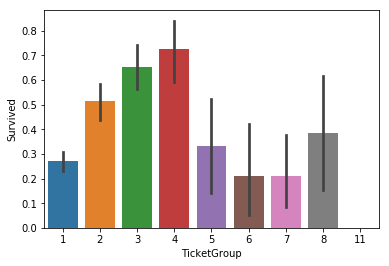

In [34]:
sns.barplot(x='TicketGroup', y='Survived', data=data)

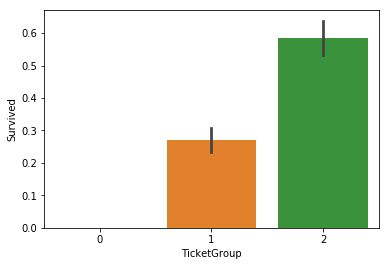

In [35]:
def Ticket_Label(s): # group all having same survival together
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

data['TicketGroup'] = data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=data)

### Age

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Fsize          1309 non-null int64
FamilyLabel    1309 non-null int64
TicketGroup    1309 non-null int64
dtypes: float64(3), int64(7), object(6)
memory usage: 163.7+ KB


In [37]:
age_df = data[['Age', 'Pclass','Sex','Title','Fsize']]

# get_dummies() only works on strings, and convert to one-hot encoding
# here it will only work on String columns ( Sex(male/female) and title)
age_df=pd.get_dummies(age_df) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
age_df.head()

,Age,Pclass,Fsize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,3,2,0,1,0,0,1,0,0,0
1,38.0,1,2,1,0,0,0,0,1,0,0
2,26.0,3,1,1,0,0,1,0,0,0,0
3,35.0,1,2,1,0,0,0,0,1,0,0
4,35.0,3,1,0,1,0,0,1,0,0,0


In [38]:
age_df[age_df.Age.notnull()].as_matrix()# converts df into 2d matrix/ as below

array([[22. ,  3. ,  2. , ...,  0. ,  0. ,  0. ],
       [38. ,  1. ,  2. , ...,  1. ,  0. ,  0. ],
       [26. ,  3. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [28. ,  3. ,  1. , ...,  0. ,  0. ,  0. ],
       [39. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38.5,  3. ,  1. , ...,  0. ,  0. ,  0. ]])

In [39]:
known_age = age_df[age_df.Age.notnull()].as_matrix() # Rows with known age
unknown_age = age_df[age_df.Age.isnull()].as_matrix() # Rows with unknown age
y = known_age[:, 0] # age columns
X = known_age[:, 1:] # all other columns
X

array([[3., 2., 0., ..., 0., 0., 0.],
       [1., 2., 1., ..., 1., 0., 0.],
       [3., 1., 1., ..., 0., 0., 0.],
       ...,
       [3., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [3., 1., 0., ..., 0., 0., 0.]])

In [40]:
#predicting ages for unknown using XGBoost
rfr=xgboost.XGBClassifier()
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
predictedAges[:10]

array([21., 30., 45., 21., 22., 21., 35., 22., 21., 21.])

In [41]:
data.loc[(data.Age.isnull()), 'Age' ] = predictedAges #put predicted ages where it was null
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fsize,FamilyLabel,TicketGroup
0,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,1
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,2
2,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1,1
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,2
4,35.0,X,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1,1


# Modeling

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Fsize          1309 non-null int64
FamilyLabel    1309 non-null int64
TicketGroup    1309 non-null int64
dtypes: float64(3), int64(7), object(6)
memory usage: 163.7+ KB


In [43]:
data.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fsize,FamilyLabel,TicketGroup
0,22.0,X,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,1


In [44]:
#choosing required columns and converting to 0/1 for strings
data=data[['Survived','Age','Cabin','Embarked','Fare','Pclass','Sex','TicketGroup','FamilyLabel','Title']]
data=pd.get_dummies(data)
data.head()

,Survived,Age,Fare,Pclass,TicketGroup,FamilyLabel,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,22.0,7.2500,3,1,2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1,1.0,38.0,71.2833,1,2,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,1.0,26.0,7.9250,3,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
3,1.0,35.0,53.1000,1,2,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
4,0.0,35.0,8.0500,3,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [45]:
data.tail()

,Survived,Age,Fare,Pclass,TicketGroup,FamilyLabel,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
1304,NaN,21.0,8.0500,3,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1305,NaN,39.0,108.9000,1,2,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1306,NaN,38.5,7.2500,3,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1307,NaN,21.0,8.0500,3,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1308,NaN,9.0,22.3583,3,2,2,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
Survived         891 non-null float64
Age              1309 non-null float64
Fare             1309 non-null float64
Pclass           1309 non-null int64
TicketGroup      1309 non-null int64
FamilyLabel      1309 non-null int64
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_X          1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Sex_female       1309 non-null uint8
Sex_male         1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8


In [47]:
train=data[:len(raw_train)] # take train data
test=data[len(raw_train):].drop(['Survived'],axis=1) # take test data
x = train.drop(['Survived'],axis=1)
y = train.Survived

In [48]:
model = ensemble.RandomForestClassifier(random_state = 10, 
                                      warm_start = True,
                                      n_estimators = 26, 
                                      max_depth = 6, 
                                      max_features = 'sqrt')
model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=True)

In [49]:
predictions = model.predict(test)
submission = pd.DataFrame({"PassengerId": raw_test["PassengerId"],
                           "Survived": predictions.astype(np.int32)})
submission.to_csv("../output", index=False)
